In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
import pickle
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score
warnings.filterwarnings("ignore")

C:\Users\User\AppData\Local\Temp\ipykernel_16184\1857596387.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("C:\\Users\\User\\Desktop\\fproject\\dataset\\liver_patient.csv")

In [3]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
df.duplicated().sum()

587

In [5]:
df = df.drop_duplicates()

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [10]:
df = df.rename({'Dataset':'Result'},axis=1)

In [11]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Result'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender']
le = LabelEncoder()
for i in var_mod:
  df[i] = le.fit_transform(df[i]).astype(int)

In [13]:
df.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Result
Age,1.000000,0.055803,0.004742,-0.000544,0.074911,-0.087815,-0.021210,-0.206173,-0.272324,-0.213303,-0.118904
Gender,0.055803,1.000000,0.088014,0.100194,-0.023596,0.082962,0.080687,-0.093133,-0.092707,-0.002848,-0.073852
Total_Bilirubin,0.004742,0.088014,1.000000,0.874185,0.206120,0.217430,0.239014,-0.004935,-0.221246,-0.207496,-0.224693
Direct_Bilirubin,-0.000544,0.100194,0.874185,1.000000,0.234568,0.237494,0.259078,0.003976,-0.226912,-0.200823,-0.251431
Alkaline_Phosphotase,0.074911,-0.023596,0.206120,0.234568,1.000000,0.126782,0.167270,-0.025214,-0.162929,-0.234255,-0.187274
Alamine_Aminotransferase,-0.087815,0.082962,0.217430,0.237494,0.126782,1.000000,0.791894,-0.031740,-0.025074,-0.006168,-0.161732
Aspartate_Aminotransferase,-0.021210,0.080687,0.239014,0.259078,0.167270,0.791894,1.000000,-0.019059,-0.082746,-0.071724,-0.151329
Total_Protiens,-0.206173,-0.093133,-0.004935,0.003976,-0.025214,-0.031740,-0.019059,1.000000,0.785160,0.238659,0.023849
Albumin,-0.272324,-0.092707,-0.221246,-0.226912,-0.162929,-0.025074,-0.082746,0.785160,1.000000,0.688588,0.157171
Albumin_and_Globulin_Ratio,-0.213303,-0.002848,-0.207496,-0.200823,-0.234255,-0.006168,-0.071724,0.238659,0.688588,1.000000,0.166607


In [14]:
df_sex = pd.get_dummies(df['Gender'])
df_new = pd.concat([df, df_sex], axis=1)
Droop_gender = df_new.drop(labels=['Gender' ],axis=1 )
Droop_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Male','Fmale','Result']

X = Droop_gender.drop('Result',axis=1)
y = Droop_gender['Result']


# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [16]:
#classifier = Sequential() # Initialising the MLP

#classifier.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 10))
#classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
#classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000,activation='relu', solver='adam', random_state=42)
# compile MLP
#classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the data
#history =classifier.fit(X_train, y_train, batch_size = 20, epochs = 50)
history = classifier.fit(X_train,y_train)

In [17]:
predictions = history.predict(X_test)

In [18]:
predictions

array([ True,  True,  True,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

       False       1.00      0.98      0.99        42
        True       0.99      1.00      1.00       131

    accuracy                           0.99       173
   macro avg       1.00      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



In [20]:
print("Report")
accuracy = (accuracy_score(y_test,predictions)*100)
print("Accuracy:", accuracy)

Report
Accuracy: 99.42196531791907


In [21]:
f1_score(y_test,predictions)

0.9961977186311787

In [22]:
recall_score(y_test,predictions,average='weighted')

0.9942196531791907

In [23]:
precision_score(y_test,predictions)

0.9924242424242424

In [24]:
print("Confusion matrix")
cm2=confusion_matrix(y_test,predictions)
print(cm2)

Confusion matrix
[[ 41   1]
 [  0 131]]


In [25]:
sensitivity2 = cm2[1,1]/(cm2[1,1]+cm2[1,0])
print('Sensitivity : ', sensitivity2 )

Sensitivity :  1.0


In [26]:
specificity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Specificity : ',specificity2)

Specificity :  0.9761904761904762


True Positive : 131
True Negative : 41
False Positive : 1
False Negative : 0

True Positive Rate : 1.0
True Negative Rate : 0.9761904761904762
False Positive Rate : 0.023809523809523808
False Negative Rate : 0.0

Positive Predictive Value : 0.9924242424242424
Negative predictive value : 1.0
Confusion matrix:
[[ 41   1]
 [  0 131]]


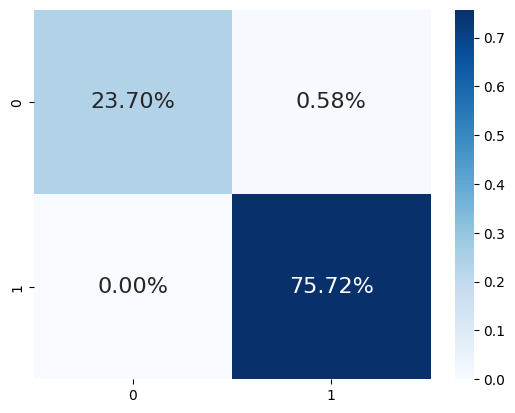

In [27]:
TN = cm2[0][0]
FN = cm2[1][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)


cm2=confusion_matrix(y_test, predictions)
print('Confusion matrix:')
print(cm2)



sns.heatmap(cm2/np.sum(cm2), annot=True, cmap = 'Blues', annot_kws={"size": 16},fmt='.2%')
plt.show()

In [28]:
pickle.dump(classifier,open('Liver-MLP.pkl', 'wb'))